In [165]:
from os import listdir
from os.path import isdir, join
import os
import glob, re
import random
import numpy as np
import matplotlib.pyplot as plt


In [166]:
dataset_path = os.getcwd() + "\\DataSet\\"
for name in listdir(dataset_path):
        if isdir(join(dataset_path, name)):
            print(name)

idle
random_gestures


In [167]:
# Create an all targets list
target_list = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(target_list)

['idle', 'random_gestures']


In [168]:
# See how many files are in each
num_samples=0
for target in target_list:
        print(len(listdir(join(dataset_path, target))))
        num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

60
60
Total samples: 120


In [169]:
# Settings
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.15
test_ratio = 0.15 


In [170]:
# Number of Rows/Columns of the csv data
NUMBER_ROWS = 127
NUMBER_COlUMNS = 64
DEPTH = 4

In [171]:
# Return float from csv file
def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

# Split the initial string in separated float substrings
def natural_keys(text):
    return [ atof(c) for c in re.split(r'[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]

In [172]:
# Initialize vars
files = []
filenames = []
y = []

# Keep only a depth multiple number of files to analyze
for index, target in enumerate(target_list):
    print('index :',index)
    print('target :',target)
    idx = []
    i_f = [[],[]]
    fln = [[],[]]
    files = glob.glob(dataset_path + target + "/*.csv")
    x = len(files)
    if (x % DEPTH) != 0:
        dif = x % DEPTH
        files = files[:x-dif] 
    print("N files: ", len(files))

    dat = ""
    fc = 0
    for i, f in enumerate(files):
        if i == 0:
            dat = f.split('_')[-7] + f.split('_')[-6] + f.split('_')[-5] + f.split('_')[-4] + f.split('_')[-3]
            fln[fc].append(f)
            fl = f.split('_')[-1]
            i_f[fc].append(int(fl.split('.')[0]))
        else:
            if dat == (f.split('_')[-7] + f.split('_')[-6] + f.split('_')[-5] + f.split('_')[-4] + f.split('_')[-3]):
                fln[fc].append(f)
                fl = f.split('_')[-1]
                i_f[fc].append(int(fl.split('.')[0]))
            else:
                fc += 1
                dat = f.split('_')[-7] + f.split('_')[-6] + f.split('_')[-5] + f.split('_')[-4] + f.split('_')[-3]
                fln[fc].append(f)
                fl = f.split('_')[-1]
                i_f[fc].append(int(fl.split('.')[0]))

    
    print('i_f :',i_f)

    for x in i_f:
        idx.append(np.argsort(np.array(x)))
    
    #print(np.array(fln[:5]))
    #print(np.array(i_f[:5]))
    #print(np.array(idx[:5]))
 
    for w, z in enumerate(idx):
        for i in range(0, len(z)-3):
            if len(z) > 4:
                aux = []
                aux.append(fln[w][z[i]])
                aux.append(fln[w][z[i+1]])
                aux.append(fln[w][z[i+2]])
                aux.append(fln[w][z[i+3]])
                filenames.append(aux)
                y.append(index)

print('N total :',len(filenames))
#print(filenames)

   

index : 0
target : idle
N files:  60
i_f : [[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 7, 8, 9], []]
index : 1
target : random_gestures
N files:  60
i_f : [[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 7, 8, 9], []]
N total : 114


In [173]:
# Check ground truth Y vector
#print(y)
print(len(y))

114


In [174]:
# Associate filename with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)
#print(filenames)

In [175]:
# Only keep the specified number of samples (shorter extraction / training)
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))
#print(filenames)

114
114


In [176]:
# Calculate validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [177]:
filenam = []
z = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenam.append(listdir(join(dataset_path, target)))
    z.append(np.ones(len(filenam[index])) * index)
filenam = [item for sublist in filenam for item in sublist]
z = [item for sublist in z for item in sublist]

c:\Users\Iman\Desktop\Stage\code\DataSet\idle
c:\Users\Iman\Desktop\Stage\code\DataSet\random_gestures


In [178]:
# Read CSV
def readCSV(filename):
    data = np.loadtxt(filename, dtype = np.float32, delimiter = ' ')
    return data

In [179]:
# MIN-MAX Function
def min_max(in_files, in_z):
    # Numpy arrays to store train, test and val matrix
    min = 5000
    max = 0
    count = 0
    
    for index, filename in enumerate(in_files):
        
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_z[index])],filename)
        
        # Check to make sure weŕe reading a .wav file
        if not path.endswith('.csv'):
            continue
        

        heatmap = readCSV(path)

        #print(heatmap.shape)
        
        min = np.minimum(min, np.min(heatmap))
        max = np.maximum(max, np.max(heatmap))
        #print("MIN: " + str(min) + "\tMAX: " + str(max))
        #print(index)
        count += 1
        
    print("Count: " + str(count))
    print("MIN: " + str(min) + "\tMAX: " + str(max))
            
    return min, max


In [180]:
global min_m
global max_m
min_m, max_m = min_max(filenam, z)


Count: 120
MIN: 1686.0	MAX: 5418.0


In [181]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

print(len(filenames_train))
print(len(filenames_val))
print(len(filenames_test))


80
17
17


In [182]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]
print(len(y_orig_train))
print(len(y_orig_val))
print(len(y_orig_test))

80
17
17


In [183]:
heatmap = readCSV(join(dataset_path, target_list[int(y_orig_train[0])],filenames_train[0][0]))
print('heatmap shape :', heatmap.shape)

heatmap shape : (127, 64)


In [184]:
# Function: take heatmap data para o dataset
def build_dataset(in_files, in_y):
    # Numpy arrays to store train, test and val matrix
    global min_m
    global max_m

    
    num = len(in_files) * (NUMBER_ROWS)
    out_x = np.zeros((num, NUMBER_COlUMNS, DEPTH), dtype = np.float32)
    out_y = []
    

    for index, filename in enumerate(in_files):

        
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])],filename[0])
        path1 = join(dataset_path, target_list[int(in_y[index])],filename[1])
        path2 = join(dataset_path, target_list[int(in_y[index])],filename[2])
        path3 = join(dataset_path, target_list[int(in_y[index])],filename[3])
        
        # Check to make sure weŕe reading a .csv file
        if not path.endswith('.csv'):
            continue
        
        #print(path)
        heatmap = readCSV(path)
        #print(heatmap.shape)
        aux_n1 = np.subtract(heatmap, min_m)
        aux_n2 = np.divide(aux_n1, (max_m - min_m))

        out_x[index*(NUMBER_ROWS):index*(NUMBER_ROWS)+NUMBER_ROWS, : , 0] = aux_n2
        
        out_y.append(in_y[index])

        heatmap = readCSV(path1)
        aux_n1 = np.subtract(heatmap, min_m)
        aux_n2 = np.divide(aux_n1, (max_m - min_m))

        out_x[index*(NUMBER_ROWS):index*(NUMBER_ROWS)+NUMBER_ROWS, : , 1] = aux_n2
        

        heatmap = readCSV(path2)
        aux_n1 = np.subtract(heatmap, min_m)
        aux_n2 = np.divide(aux_n1, (max_m - min_m))

        out_x[index*(NUMBER_ROWS):index*(NUMBER_ROWS)+NUMBER_ROWS, : , 2] = aux_n2
        

        heatmap = readCSV(path3)
        aux_n1 = np.subtract(heatmap, min_m)
        aux_n2 = np.divide(aux_n1, (max_m - min_m))

        out_x[index*(NUMBER_ROWS):index*(NUMBER_ROWS)+NUMBER_ROWS, : , 3] = aux_n2
        
        #print(out_x[index].shape)
        
    print("X: " + str(out_x.shape) + "\tY: " + str(len(out_y)))
        
            
    return out_x, out_y

#VERIFICAR O ARRAY DE FLOAT DO X E EVENTUALMENTE PLOTAR

In [185]:
# Create train, validation, and test sets
x_train, y_train= build_dataset(filenames_train, y_orig_train)

x_val, y_val= build_dataset(filenames_val, y_orig_val)

x_test, y_test= build_dataset(filenames_test, y_orig_test)


X: (10160, 64, 4)	Y: 80
X: (2159, 64, 4)	Y: 17
X: (2159, 64, 4)	Y: 17


In [186]:
for i in range(0,5):
    print(filenames_train[i])

['c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\random_gestures\\test_2024_6_5_10_12_31_6.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\random_gestures\\test_2024_6_5_10_12_31_7.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\random_gestures\\test_2024_6_5_10_12_31_8.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\random_gestures\\test_2024_6_5_10_12_31_9.csv']
['c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\idle\\test_2024_6_5_10_38_31_31.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\idle\\test_2024_6_5_10_38_31_32.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\idle\\test_2024_6_5_10_38_31_33.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\idle\\test_2024_6_5_10_38_31_34.csv']
['c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\random_gestures\\test_2024_6_5_10_12_31_56.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\random_gestures\\test_2024_6_5_10_12_31_57.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\random_gestures\

In [187]:
for i in range(0,5):
    print(y_train[i])

1
0
1
0
0


In [188]:
# Save features and truth vector (y) sets to disk
feature_sets_file='all_targets_' + str(int(min_m)) + '_' + str(int(max_m)) + '.npz'
np.savez(feature_sets_file,
        x_train=x_train,
        y_train=y_train,
        x_val=x_val,
        y_val=y_val,
        x_test=x_test,
        y_test=y_test)

In [189]:
#daqui pra frente é teste
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [190]:
print(x_train.shape)

(10160, 64, 4)


In [191]:
x_traint = x_train[128*3:128*4-1,:,:].reshape(
                          NUMBER_ROWS,
                          NUMBER_COlUMNS,
                          DEPTH)
x_traint.shape
print(x_traint[:,:,0].shape)
print(x_traint[:,:,1].shape)

(127, 64)
(127, 64)


(127, 64, 4)
(127, 64)


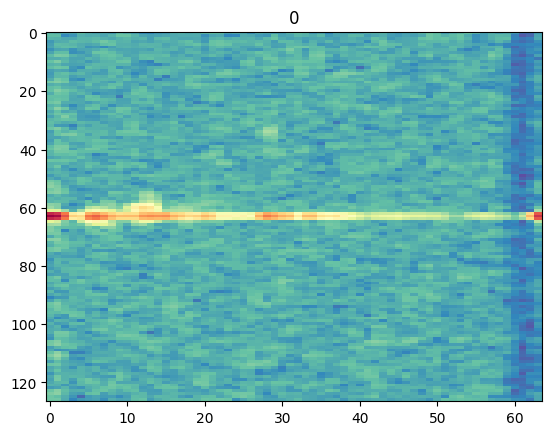

(127, 64)


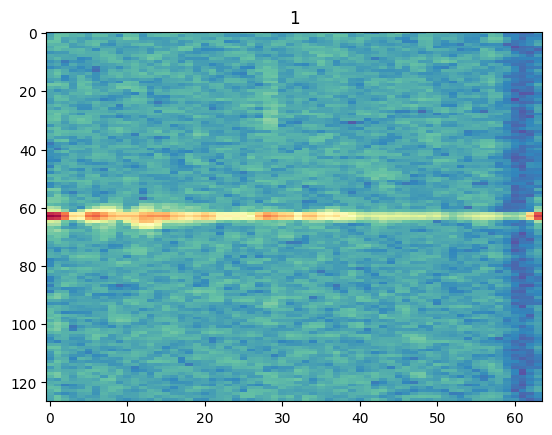

(127, 64)


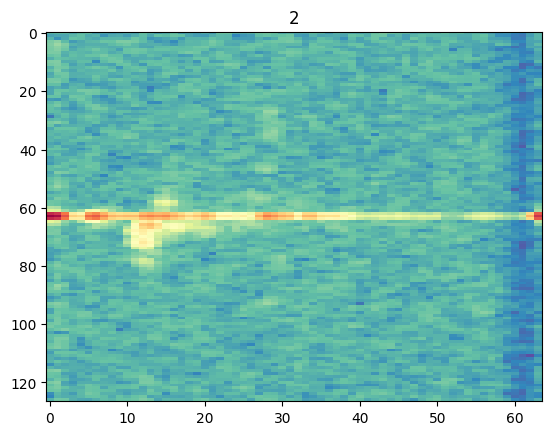

(127, 64)


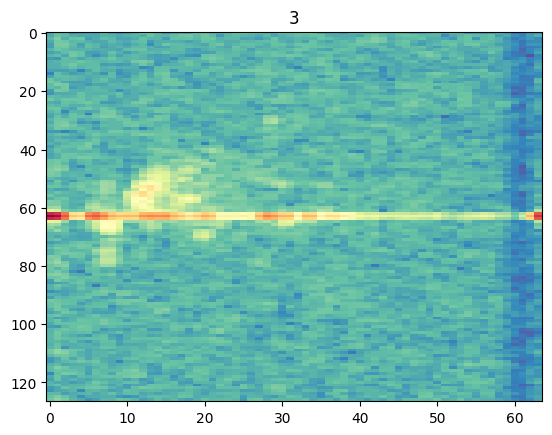

In [192]:
# Print a pack of 4 samples
count = 0

print_idx = 15

#print(filenames[print_idx])

x_traint = x_train[NUMBER_ROWS*print_idx:NUMBER_ROWS*(print_idx+1),:,:].reshape(
                          NUMBER_ROWS,
                          NUMBER_COlUMNS,
                          DEPTH)
print(x_traint.shape)
for x in range(0,4,1):
    f = x_traint[:,:,x]
    print(f.shape)
    # read the csv file
    plt.imshow(f, cmap='Spectral_r', interpolation='nearest', aspect='auto')
    plt.title(count)
    plt.show()
    count+=1


In [193]:
len(feature_sets['x_train'])

10160

In [194]:
len(feature_sets['y_train'])

80

In [195]:
len(feature_sets['x_val'])

2159

In [196]:
len(feature_sets['y_val'])

17

In [197]:
len(feature_sets['x_test'])

2159

In [198]:
len(feature_sets['y_test'])

17